#Predicting Customer Happiness

Data source: Apziva

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Happiness/ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


The dataset contains the following attributes:

- Y = target attribute with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

The features (X1-6) are survey questions with their values being integers from 1 - 5, with 1 being "Srongly Disagree" and 5 being "Strongly Agree".

In [ ]:
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

The dataset does not contain any null values.

In [ ]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The mean of Y is close to 50%, meaning there are close to an equal number of data points for both classes.

In [ ]:
data.var()

Y     0.249714
X1    0.640000
X2    1.242984
X3    1.047429
X4    0.766984
X5    1.317079
X6    0.654984
dtype: float64

The variance of features is in the range 0.64 to 1.32. As the values of the features range from 1 to 5, the variances are significant from data point to data point. Thus, it is important to include all features when building the classification model.

A logistic regression model will be used because this is a binary classification problem.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Y', axis = 1)
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.700000,0.681818,0.6875,0.690909,0.689773
recall,0.500000,0.833333,0.6875,0.666667,0.687500
f1-score,0.583333,0.750000,0.6875,0.666667,0.677083
support,14.000000,18.000000,0.6875,32.000000,32.000000


In [ ]:
model2 = LogisticRegression(solver = 'lbfgs')
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

report2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict = True))
report2

,0,1,accuracy,macro avg,weighted avg
precision,0.777778,0.695652,0.71875,0.736715,0.731582
recall,0.500000,0.888889,0.71875,0.694444,0.718750
f1-score,0.608696,0.780488,0.71875,0.694592,0.705329
support,14.000000,18.000000,0.71875,32.000000,32.000000


I was able to improve the accuracy of the prediction by changing the solver used by the LogisticRegresion algorithm. While an accuracy of 72% is sufficient for the problem, I will build a new model to see if the score could be improved further. I will use Keras to build a two-layer artificial neural network (ANN) that is based on a logistic regression operation.

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

# instantiate sequential model
model3 = Sequential()

# add layers
model3.add(InputLayer(input_shape=(6, )))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


A sequential model is a stack of layers organized as the input, hidden, and output layers. For our purposes, there are no hidden layers as data points of a simple logistic regression model require only one transformation, the sigmoid activation.

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

report3 = model3.fit(X_train, y_train, 
                        epochs=9, batch_size=32,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/9
3/3 [==============================] - 1s 124ms/step - loss: 0.6759 - accuracy: 0.5200 - val_loss: 0.6693 - val_accuracy: 0.5263
Epoch 2/9
3/3 [==============================] - 0s 22ms/step - loss: 0.6754 - accuracy: 0.5200 - val_loss: 0.6693 - val_accuracy: 0.5263
Epoch 3/9
3/3 [==============================] - 0s 19ms/step - loss: 0.6754 - accuracy: 0.5200 - val_loss: 0.6692 - val_accuracy: 0.5263
Epoch 4/9
3/3 [==============================] - 0s 20ms/step - loss: 0.6754 - accuracy: 0.5200 - val_loss: 0.6690 - val_accuracy: 0.5263
Epoch 5/9
3/3 [==============================] - 0s 21ms/step - loss: 0.6754 - accuracy: 0.5200 - val_loss: 0.6689 - val_accuracy: 0.5263
Epoch 6/9
3/3 [==============================] - 0s 22ms/step - loss: 0.6755 - accuracy: 0.5200 - val_loss: 0.6688 - val_accuracy: 0.5263
Epoch 7/9
3/3 [==============================] - 0s 20ms/step - loss: 0.6755 - accuracy: 0.5200 - val_loss: 0.6687 - val_accuracy: 0.5789
Epoch 8/9
3/3 [==================

Optimizers are used to improve the speed and accuracy of algorithms. The Adam optimizer is generally regarded as the best  overall for classification problems.

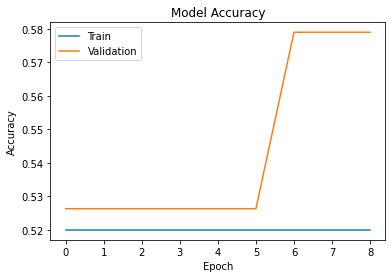

In [ ]:
plt.plot(report3.history['accuracy'], label='Train')
plt.plot(report3.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

In [ ]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 115ms/step - loss: 0.6425 - accuracy: 0.6875
Test loss: 0.6424961090087891
Test accuracy: 0.6875


While I attempted to use an ANN to improve the accuracy of prediciting customer happiness, it resulted in the same accuracy score as the skickit-learn LogisticRegression algorithm that uses liblinear as its solver. Thus, the best accuracy for this classification problem is 72% using the skickit-learn LogisticRegression algorithm with the lbfgs solver.
